In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

## K-means clustering

In [3]:
img = cv2.imread("dog.jpeg")
img.shape

(178, 283, 3)

In [14]:
def kmeans_segment(img, num_clusters):
    height, width, channels = img.shape
    image_pixels  = img.reshape((-1, 3))

    kmeans = KMeans(num_clusters, random_state=38)
    labels = kmeans.fit_predict(image_pixels)

    cluster_centers = kmeans.cluster_centers_
    segmented = cluster_centers[labels]

    segmented_img = segmented.reshape(height, width, channels)
    segmented_img = np.clip(segmented_img, 0, 255).astype(np.uint8)

    return segmented_img, labels.reshape(height, width)

def kmeans_color_segment_with_mask(img, n_clusters=3):
    segmented_img, labels = kmeans_segment(img, n_clusters)

    # Create binary masks for each cluster
    masks = []
    for i in range(n_clusters):
        mask = (labels == i).astype(np.uint8) * 255
        masks.append(mask)

    return segmented_img, masks

In [27]:
n_clusters = 5

segmented_img, masks = kmeans_color_segment_with_mask(img, n_clusters)

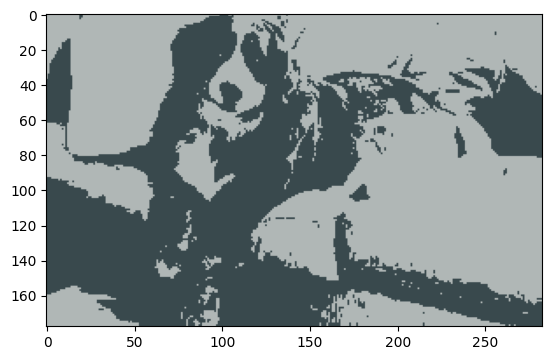

In [28]:
plt.imshow(segmented)

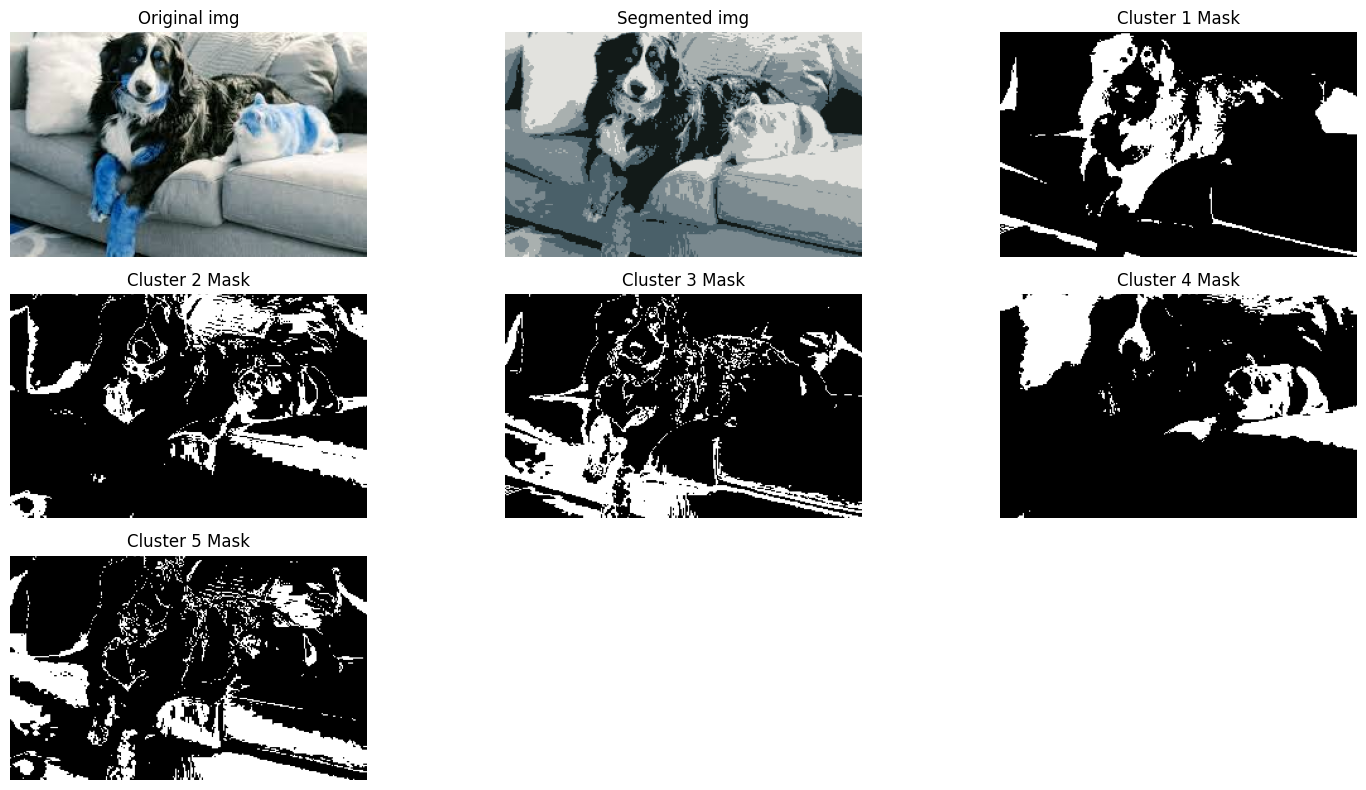

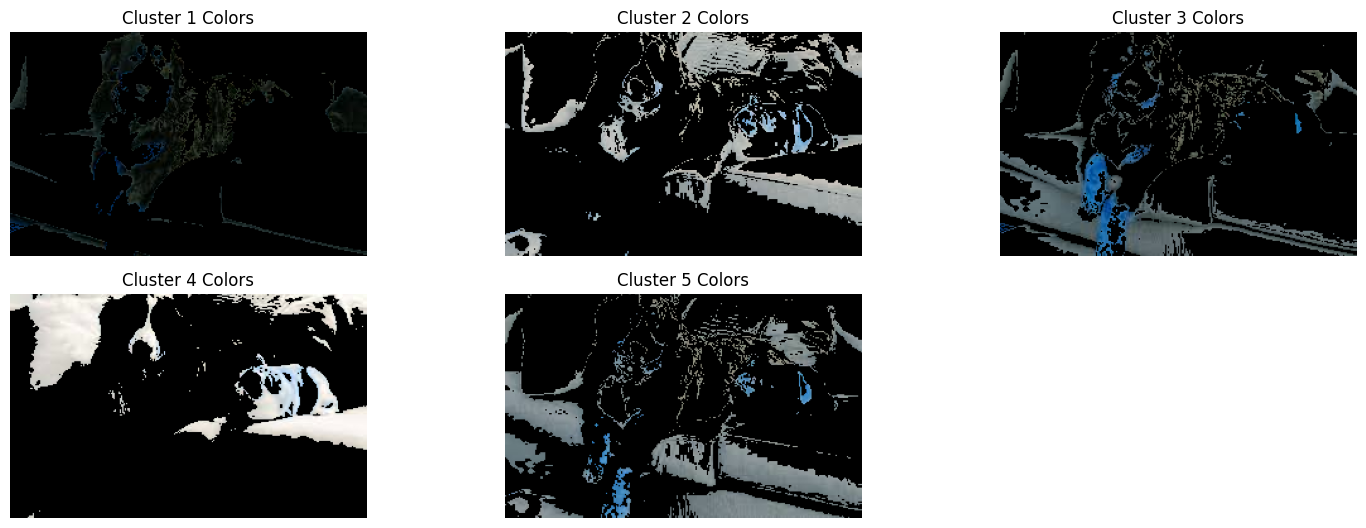

In [31]:
# Create a figure with grid layout
plt.figure(figsize=(15, 8))

# Plot original img
plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title('Original img')
plt.axis('off')

# Plot segmented img
plt.subplot(3, 3, 2)
plt.imshow(segmented_img)
plt.title('Segmented img')
plt.axis('off')

# Plot masks for each cluster
for i in range(n_clusters):
    plt.subplot(3, 3, i + 3)
    plt.imshow(masks[i], cmap='gray')
    plt.title(f'Cluster {i+1} Mask')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: Display each cluster's colors separately
plt.figure(figsize=(15, 8))

for i in range(n_clusters):
    plt.subplot(3, 3, i + 1)
    # Create masked img showing only this cluster
    masked = img.copy()
    mask = masks[i][:, :, np.newaxis] / 255  # Convert to 0-1 range and add channel dimension
    masked = (masked * mask).astype(np.uint8)
    plt.imshow(masked)
    plt.title(f'Cluster {i+1} Colors')
    plt.axis('off')

plt.tight_layout()
plt.show()